<a href="https://colab.research.google.com/github/geetakumri/SQL_PRACTICE/blob/main/MachineLearning_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Libraries and the Dataset

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling  import SMOTE
from xgboost.training import train
sns.set_style('whitegrid')
from IPython.display import display
from pandas.api.types import is_numeric_dtype
import os
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [59]:
df = pd.read_csv('dataset.csv',delimiter = ';')
df.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,account_worst_status_6_12m,age,avg_payment_span_0_12m,avg_payment_span_0_3m,merchant_category,merchant_group,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,name_in_email,num_active_div_by_paid_inv_0_12m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_0_12m,num_arch_ok_12_24m,num_arch_rem_0_12m,num_arch_written_off_0_12m,num_arch_written_off_12_24m,num_unpaid_bills,status_last_archived_0_24m,status_2nd_last_archived_0_24m,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,NaN,20,12.692308,8.333333,Dietary supplements,Health & Beauty,True,31638.0,31638.0,no_match,0.153846,2,0,0,13,14,0,0.0,0.0,2,1,1,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,50,25.833333,25.000000,Books & Magazines,Entertainment,True,13749.0,13749.0,F+L,0.000000,0,0,0,9,19,3,0.0,0.0,0,1,1,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,22,20.000000,18.000000,Diversified entertainment,Entertainment,True,29890.0,29890.0,L1+F,0.071429,1,0,0,11,0,3,0.0,0.0,1,1,1,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,4.687500,4.888889,Diversified entertainment,Entertainment,True,40040.0,40040.0,F1+L,0.031250,1,0,0,31,21,0,0.0,0.0,1,1,1,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,25,13.000000,13.000000,Electronic equipment & Related accessories,Electronics,True,7100.0,7100.0,F+L,0.000000,0,0,0,1,0,0,0.0,0.0,0,1,0,0,1,1,1,0,0,0,7100,12.698611,NaN


In [69]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
uuid,99976,99976,3b628a1a-f154-4c8c-9c1a-d45c5cd82cff,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,89976,NaN,NaN,NaN,0.0143149,0.118786,0,0,0,0,1
account_amount_added_12_24m,99976,NaN,NaN,NaN,12255.1,35481.5,0,0,0,4937.25,1.12878e+06
account_days_in_dc_12_24m,88140,NaN,NaN,NaN,0.223043,5.80812,0,0,0,0,365
account_days_in_rem_12_24m,88140,NaN,NaN,NaN,5.04462,22.864,0,0,0,0,365
account_days_in_term_12_24m,88140,NaN,NaN,NaN,0.286896,2.92991,0,0,0,0,97
age,99976,NaN,NaN,NaN,36.0163,13.0013,18,25,34,45,100
avg_payment_span_0_12m,76140,NaN,NaN,NaN,17.9715,12.7511,0,10.8,14.9091,21,260
avg_payment_span_0_3m,50671,NaN,NaN,NaN,14.9898,10.2974,0,8.4,13,18.2857,87
merchant_category,99976,57,Diversified entertainment,38614,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uuid                              99976 non-null  object 
 1   default                           89976 non-null  float64
 2   account_amount_added_12_24m       99976 non-null  int64  
 3   account_days_in_dc_12_24m         88140 non-null  float64
 4   account_days_in_rem_12_24m        88140 non-null  float64
 5   account_days_in_term_12_24m       88140 non-null  float64
 6   age                               99976 non-null  int64  
 7   avg_payment_span_0_12m            76140 non-null  float64
 8   avg_payment_span_0_3m             50671 non-null  float64
 9   merchant_category                 99976 non-null  object 
 10  merchant_group                    99976 non-null  object 
 11  has_paid                          99976 non-null  bool   
 12  max_

#### Separating the prediction data set

In [71]:
df_train = df[~df.default.isnull()]
df_test = df[df.default.isnull()]

## Data Preparation

#### Removing insignificant features


Fields with high cardinality variables are not sutailable for predections, eg uuid.
1. uuid - high cardinality variables
2. name_in_mail - Insignificant feature to keep.
3. merchant_category - Removing this column as Merchant group column is also giving the detail of merchant on higher level

In [60]:
cols_to_drop = ['uuid','name_in_email','merchant_category']

In [61]:
train_df = df_train.drop(cols_to_drop, axis=1)
train_df.columns

Index(['default', 'account_amount_added_12_24m', 'account_days_in_dc_12_24m',
       'account_days_in_rem_12_24m', 'account_days_in_term_12_24m',
       'account_incoming_debt_vs_paid_0_24m', 'account_status',
       'account_worst_status_0_3m', 'account_worst_status_12_24m',
       'account_worst_status_3_6m', 'account_worst_status_6_12m', 'age',
       'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'merchant_group',
       'has_paid', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m',
       'num_unpaid_bills', 'status_last_archived_0_24m',
       'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',
       'status_max_archived_0_24_months', 'recovery_

## Handeling Missing Values

In [76]:
numeric_cols = ['account_amount_added_12_24m', 'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m', 'age', 'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m', 'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m', 'num_unpaid_bills', 'recovery_debt', 'sum_capital_paid_account_0_12m', 'sum_capital_paid_account_12_24m', 'sum_paid_inv_0_12m', 'time_hours']
categorical_cols = ['default', 'account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m', 'account_worst_status_3_6m', 'account_worst_status_6_12m', 'merchant_category', 'merchant_group', 'name_in_email', 'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months', 'status_max_archived_0_12_months', 'status_max_archived_0_24_months']

In [62]:
missing_val_perc_df = round(df_train.isnull().sum() * 100 / len(df_train), 2).sort_values(ascending=False)
missing_features = missing_val_perc_df[missing_val_perc_df > 50].index
df_train.drop(missing_features, axis=1, inplace=True)

#### Imputing numerical value

In [77]:
df_train[numeric_cols].fillna(df_train[numeric_cols].median(), inplace=True)

KeyError: ignored

## Exploratory Data Analysis 

#### Target variable distribution

In [5]:
df_train['default'].value_counts()

0.0    88688
1.0     1288
Name: default, dtype: int64

With the above result we can conclude that the data is highly imbalanced. In order to balance the data oversampling technique is required

Text(0.5, 1.0, 'Default Distribution')

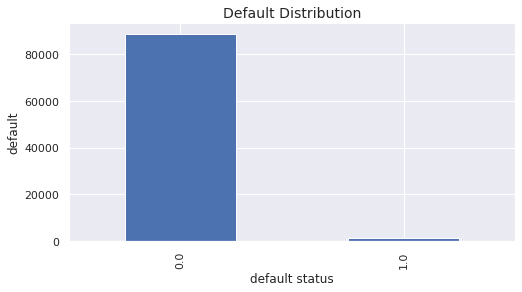

In [6]:
# plot to show defaulters distribution 
plt.figure(figsize=(8,4))
df_train['default'].value_counts().plot(kind = 'bar')
plt.ylabel('default')
plt.xlabel('default status')
plt.title('Default Distribution',fontsize=14)

#### Univariate Analysis of features

In [20]:
def plot_dist(*args):
    plt.figure(figsize=(45,65))
    for i,arg in enumerate(args):
      plt.subplot(4,3,i+1)
      sns.distplot(arg)
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

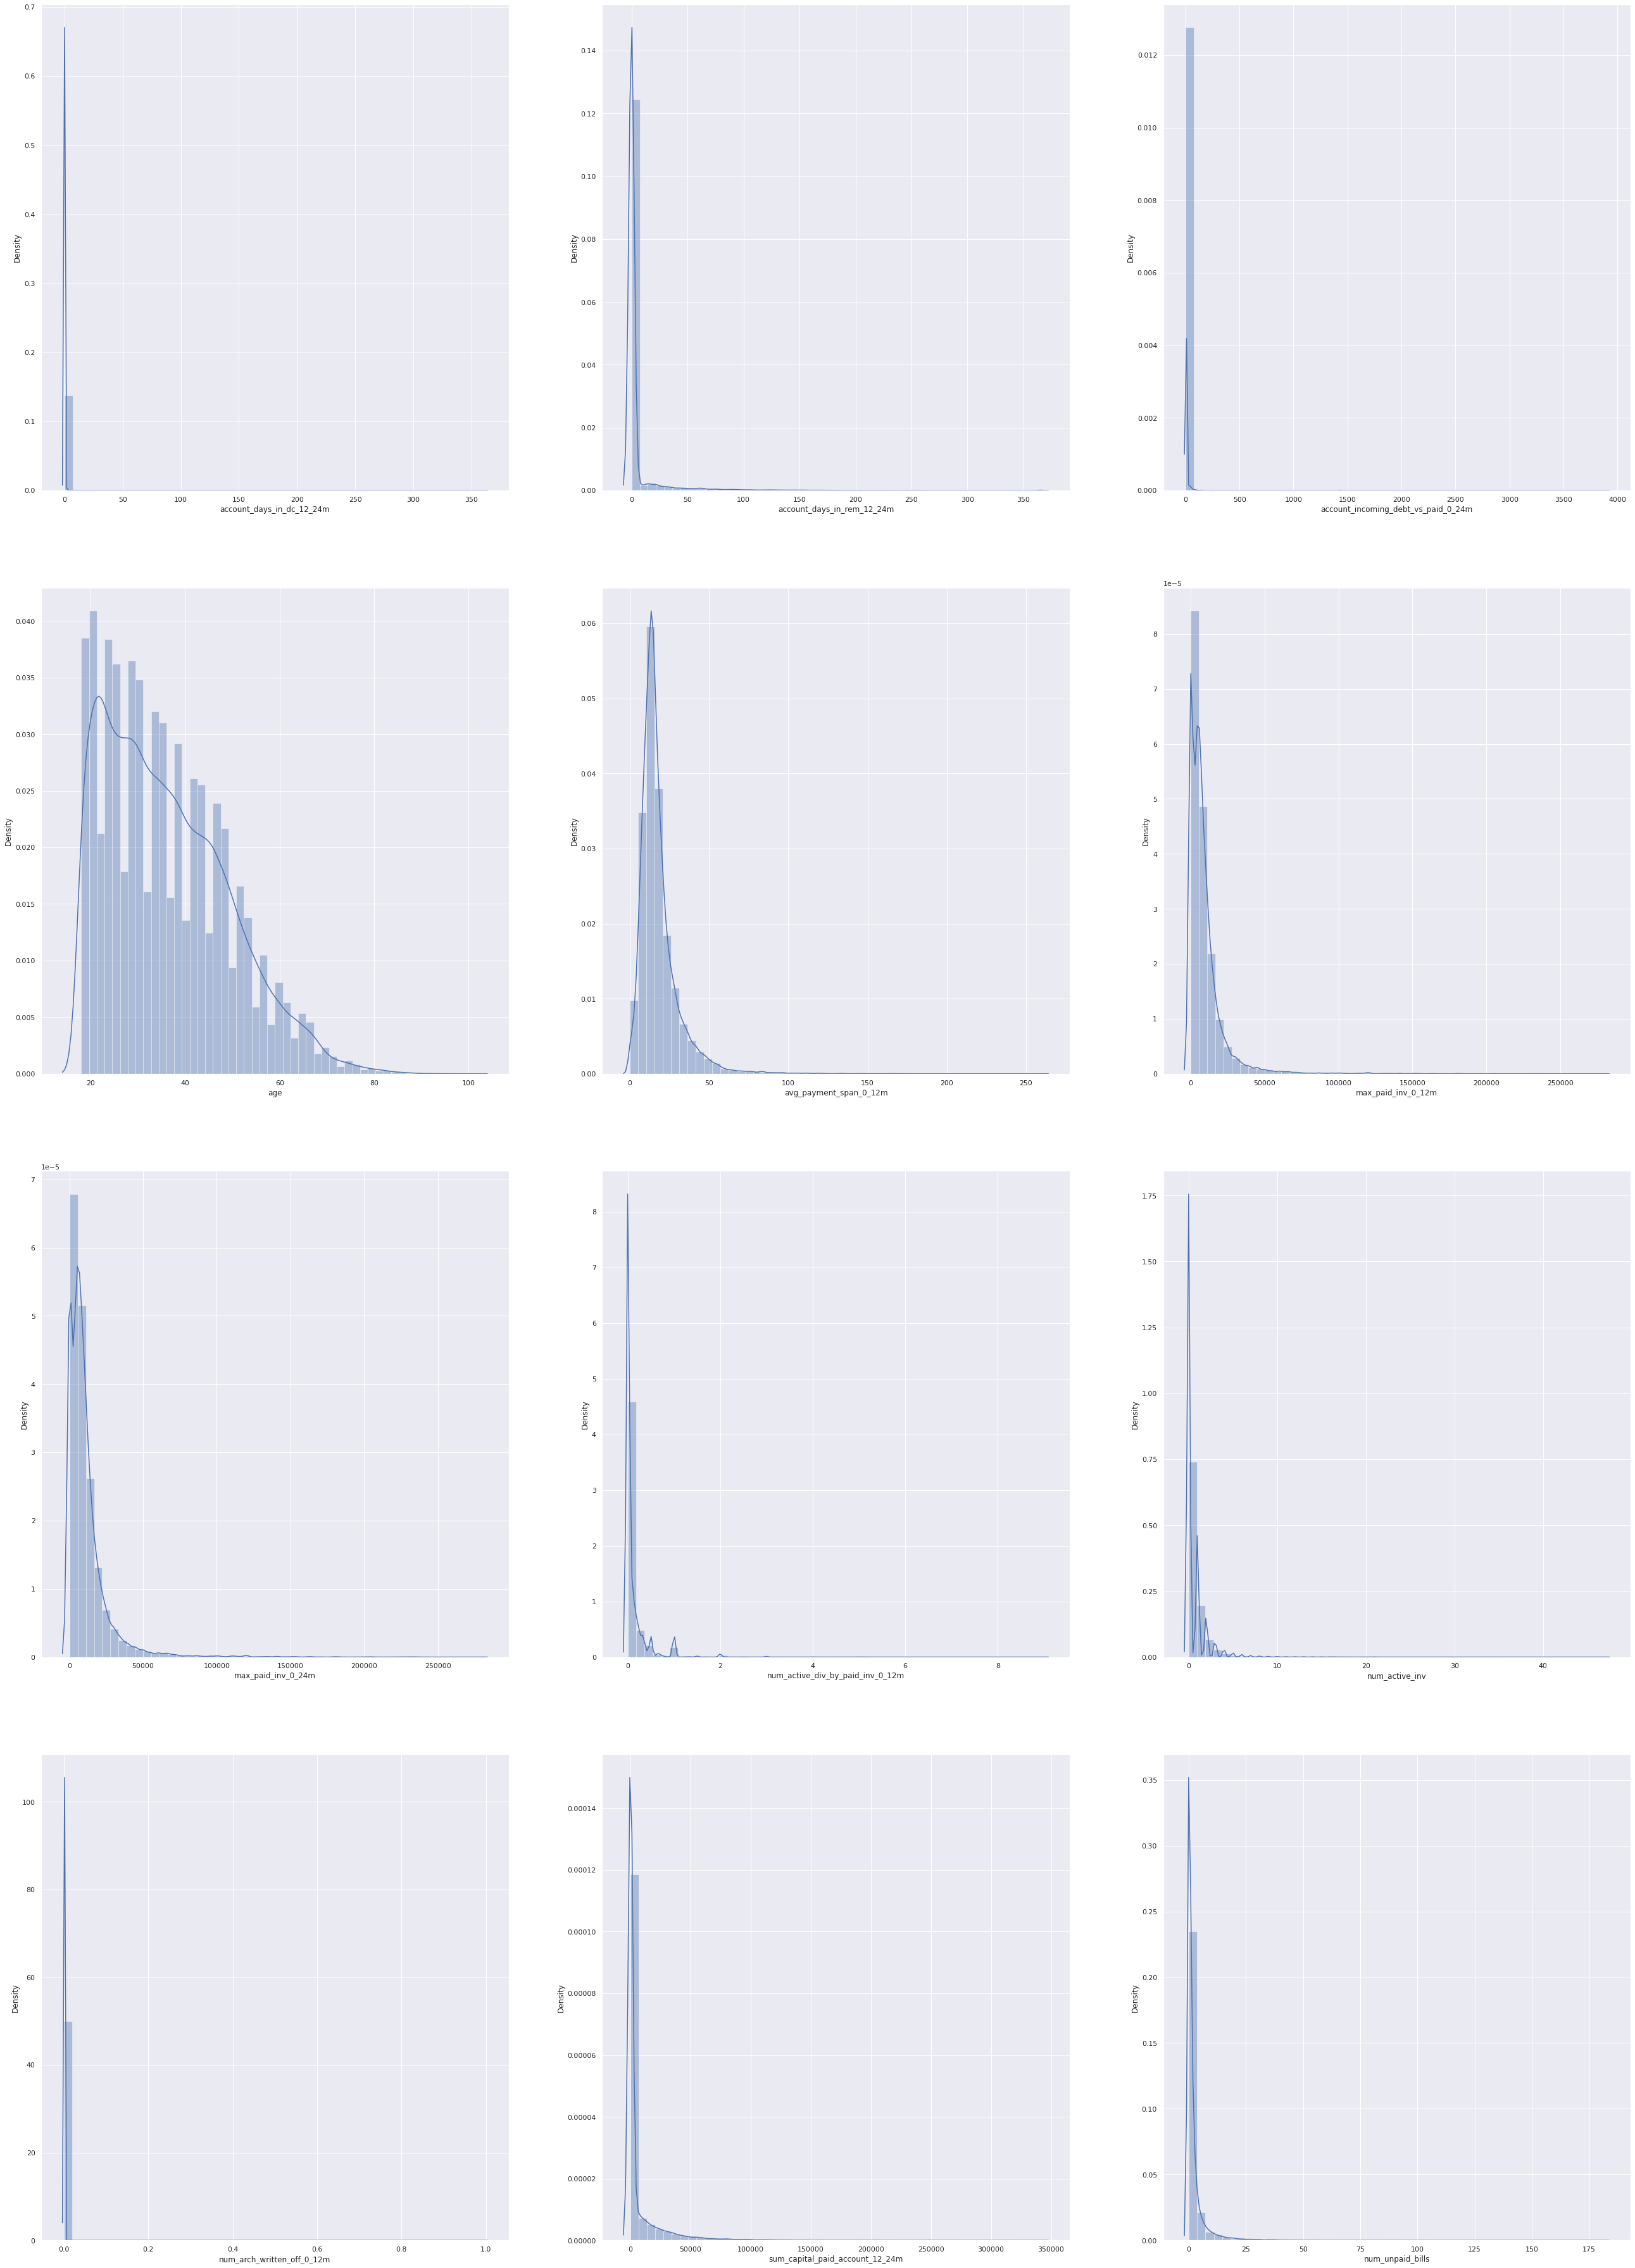

In [22]:
plot_dist(df_train['account_days_in_dc_12_24m'],df_train['account_days_in_rem_12_24m'],
          df_train['account_incoming_debt_vs_paid_0_24m'],df_train['age'],
          df_train['avg_payment_span_0_12m'],df_train['max_paid_inv_0_12m'],
          df_train['max_paid_inv_0_24m'],df_train['num_active_div_by_paid_inv_0_12m'],df_train['num_active_inv'],
          df_train['num_arch_written_off_0_12m'],df_train['sum_capital_paid_account_12_24m'],df_train['num_unpaid_bills'])


The feature are was mostly skewed and also has outliers

#### Bivariate EDA

Let's try to analyze the features with respect to target variable

In [54]:
# create box plot 
def plot_box_chart(*args):
    plt.figure(figsize=(20,16))
    for i,arg in enumerate(args):
      plt.subplot(3,3,i+1)
      sns.boxplot(data=df_train, y=arg,x="default",hue="default",
                showfliers=False)

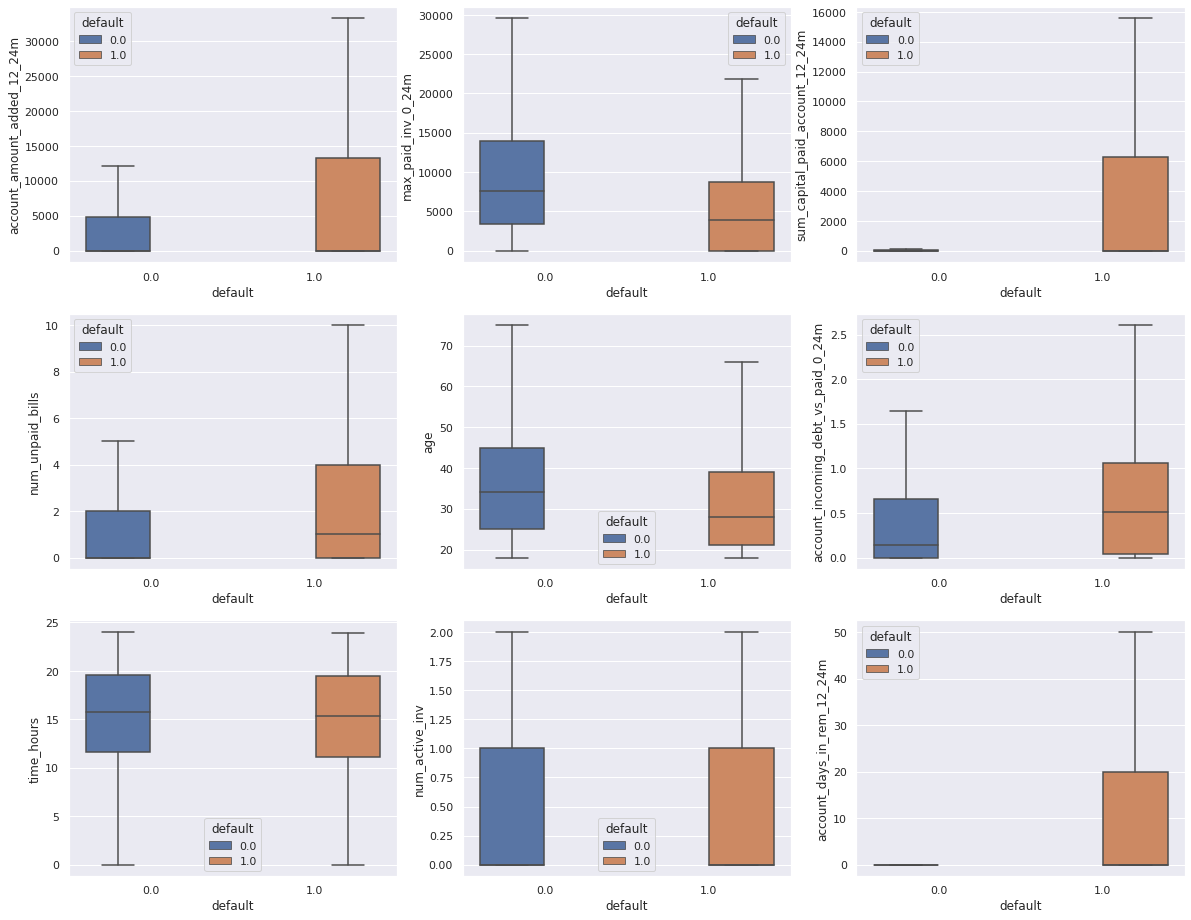

In [58]:
plot_box_chart('account_amount_added_12_24m','max_paid_inv_0_24m',
               'sum_capital_paid_account_12_24m','num_unpaid_bills','age',
               'account_incoming_debt_vs_paid_0_24m','time_hours','num_active_inv',
               'account_days_in_rem_12_24m',)

#### Analyzing numerical and categorical features

In [66]:
numeric_cols = ['account_amount_added_12_24m', 'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m', 'age', 'avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'num_active_div_by_paid_inv_0_12m', 'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m', 'num_unpaid_bills', 'recovery_debt', 'sum_capital_paid_account_0_12m', 'sum_capital_paid_account_12_24m', 'sum_paid_inv_0_12m', 'time_hours']
categorical_cols = ['default', 'account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m', 'account_worst_status_3_6m', 'account_worst_status_6_12m', 'merchant_category', 'merchant_group', 'name_in_email', 'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months', 'status_max_archived_0_12_months', 'status_max_archived_0_24_months']

In [72]:

train_file_path = '../input/train.csv'
insignificant_cols_for_training = ['uuid','name_in_email','merchant_category']
insignificant_cols_for_testing = ['default','name_in_email','merchant_category']
feature_to_encode = 'merchant_group'
#TO-DO -Check delete rows condition based on % 

def separate_numercal_categorical_cols(file):
    with open(file) as f:
        lines = f.readlines()

    num_cols=[]
    cat_cols=[]
    for line in lines:
        cols_details = line.split(' ')
        if((cols_details[1])=="numeric\n"):
            num_cols.append(cols_details[0])
        elif((cols_details[1])=="categorical\n"):
            cat_cols.append(cols_details[0])
    return num_cols,cat_cols

def get_specific_cols(df, selected_cols):
    return [cname for cname in selected_cols if cname in df.columns]

def drop_insignificant_cols(df, insignificant_cols):
    df.drop(insignificant_cols, axis=1, inplace=True)

def drop_cols_missing_values(df):
    missing_val_perc_df = round(df.isnull().sum() * 100 / len(df), 2).sort_values(ascending=False)
    missing_features = missing_val_perc_df[missing_val_perc_df > 50].index
    df.drop(missing_features, axis=1, inplace=True)
    
def impute_numerical_cols(df, numerical_cols):
    remaning_num_cols = get_specific_cols(df,numerical_cols)
    for col in remaning_num_cols:
        df[col].fillna(df[col].median(), inplace=True)


def impute_catagorical_cols(df, categorical_cols):
    remaning_cat_cols = get_specific_cols(df,categorical_cols)
    for col in remaning_cat_cols:
        df[col].fillna(df[col].mode(), inplace=True)
    

def perform_one_hot_encoding(df, feature_to_encode):
    dummies = pd.get_dummies(df[feature_to_encode])
    df.drop(feature_to_encode, axis=1, inplace=True)
    return pd.concat([df, dummies], axis=1)

def perform_over_sampling(df):
    X = df.drop(columns = ['default'])
    y = df['default']
    smote = SMOTE()
    X, y = smote.fit_resample(X, y)
    return X, y

In [75]:
def perform_data_preprocessing(train_dataframe):
    num_cols , cat_cols = separate_numercal_categorical_cols(os.getcwd() +"\\src\\columns.txt")

    drop_insignificant_cols(train_dataframe, insignificant_cols_for_training)
    drop_cols_missing_values(train_dataframe)

    impute_numerical_cols(train_dataframe, num_cols)
    impute_catagorical_cols(train_dataframe, cat_cols)
    
    encoded_df = perform_one_hot_encoding(train_dataframe, feature_to_encode)
    return perform_over_sampling(encoded_df)

In [ ]:
train_df.corr()
plt.figure(figsize=(20, 20))
ax = sns.heatmap(train_df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation Plot')
plt.show()

### From the heat-map we can see following features are highly correlated
- max_paid_inv_0_12m and max_paid_inv_0_24m
- num_arch_ok_0_12m and num_arch_ok_12_24m
- status_max_archived_0_12_months and status_max_archived_0_24_months

In [ ]:
train_df.drop(['max_paid_inv_0_24m', 'num_arch_ok_12_24m', 'status_max_archived_0_12_months'], axis=1, inplace=True)
train_df.columns

## Handeling Missing Values

## Handeling Categorical Variable

#### One -Hot Encoding 

In [ ]:
#merchant_group_one_hot = pd.get_dummies(data['merchant_group'],drop_first=True,)
#merchant_group_one_hot

In [ ]:
#data = data.drop('merchant_group',axis = 1)
#pd.concat([data, merchant_group_one_hot], axis=1)

In [ ]:
data.columns

#### The column 'has_paid' has boolean type , it can be replaced by 1 for True and 0 for False

In [ ]:
data['has_paid']=data['has_paid'].map({True:1,False:0})

In [ ]:
data.head(5)

## Model Building

In [ ]:
X = train_df.drop(columns = ['default'])
y = train_df['default']

In [ ]:
X.head(5)
X.dtypes
print(type(X.dtypes))

In [ ]:
cols = X.columns
num_cols = X._get_numeric_data().columns
cat_col_names = list(set(cols) - set(num_cols))
cat_col_idx = []
for c in cat_col_names:
  cat_col_idx.append(X.columns.get_loc(c))

cat_col_idx

In [ ]:
#scalar = StandardScaler()
#X_scaled = scalar.fit_transform(X)

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size= 0.25, random_state = 0)

In [ ]:
clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        cat_features=cat_col_idx, 
        eval_set=(x_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

In [ ]:
print(clf.predict_proba(x_val))

In [ ]:
print(clf.predict(x_val))

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
clf = CatBoostClassifier(
    iterations=100,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_col_idx,
    eval_set=(x_val, y_val),
    verbose=False,
    plot=True
)


In [ ]:
clf.feature_importances_

In [ ]:
clf.feature_names_